In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
%matplotlib inline

In [2]:
#Preprocessing
#Step 2:Read Data
df=pd.read_excel("31072019_Result.xlsx")
df.head()
print(df.shape)

(1000, 40)


In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

C:\Users\Rahul\AppData\Local\Continuum\anaconda3\lib\site-packages\astropy\config\configuration.py:536: ConfigurationMissingWarning: Configuration defaults will be used due to FileNotFoundError:2 on None
  warn(ConfigurationMissingWarning(msg))


In [4]:
#Step 4:fill null values
df.fillna(0,inplace=True)
df.head()

StudentId  Class  Division  Math1  Physics1  Chemistry1  Biology1  \
0         17      1         2     71       0.0         0.0       0.0   
1         22      1         1     73       0.0         0.0       0.0   
2         25      1         3     49       0.0         0.0       0.0   
3         26      1         1     57       0.0         0.0       0.0   
4         30      1         1     47       0.0         0.0       0.0   

   Geography1  Civics1  History1  ...  Marks%(2018)  TotalMarks(2017)  \
0         0.0      0.0       0.0  ...           0.0               0.0   
1         0.0      0.0       0.0  ...           0.0               0.0   
2         0.0      0.0       0.0  ...           0.0               0.0   
3         0.0      0.0       0.0  ...           0.0               0.0   
4         0.0      0.0       0.0  ...           0.0               0.0   

   Marks%(2017)  Grades(as_per_marks)  TravelTime  ResourceVisited  \
0           0.0                     2           2               33   
1           0.0                     2           2               80   
2           0.0                     2           2               50   
3           0.0                     2           4               45   
4           0.0                     2           2               40   

   Discussion  HealthStatus  MQuali  FQuali  
0          43             1       0       1  
1          32             1       4       0  
2          10             1       2       1  
3          84             2       3       0  
4          68             1       4       0  

[5 rows x 40 columns]

In [5]:
#set_option is used to display all the hidden rows and columns.
pd.set_option("display.max_columns",None)
df.head()

StudentId  Class  Division  Math1  Physics1  Chemistry1  Biology1  \
0         17      1         2     71       0.0         0.0       0.0   
1         22      1         1     73       0.0         0.0       0.0   
2         25      1         3     49       0.0         0.0       0.0   
3         26      1         1     57       0.0         0.0       0.0   
4         30      1         1     47       0.0         0.0       0.0   

   Geography1  Civics1  History1  Hindi1  English1  SocialStd1  Science1  \
0         0.0      0.0       0.0      57        47        69.0      56.0   
1         0.0      0.0       0.0      92        76        63.0      42.0   
2         0.0      0.0       0.0      48        90        62.0      60.0   
3         0.0      0.0       0.0      70        56        61.0      43.0   
4         0.0      0.0       0.0      52        90        60.0      42.0   

   Drawing1  Mteacher1  PhyTeacher1  ChemTeacher1  BioTeacher1  GeogTeacher1  \
0      47.0         11            0             0            0             0   
1      38.0         12            0             0            0             0   
2      32.0         13            0             0            0             0   
3      42.0         12            0             0            0             0   
4      43.0         12            0             0            0             0   

   CivTeacher1  HisTeacher1  HinTeacher1  EngTeacher1  SSTTeacher1  \
0            0            0            0            0            1   
1            0            0            1            1            2   
2            0            0            2            2            3   
3            0            0            1            1            2   
4            0            0            1            1            2   

   SCTeacher1  DrawTeacher1  TotalMarks(2019)  Marks%(2019)  TotalMarks(2018)  \
0           1             1               347     63.090909               0.0   
1           2             2               384     69.818182               0.0   
2           3             3               341     62.000000               0.0   
3           2             2               329     59.818182               0.0   
4           2             2               334     60.727273               0.0   

   Marks%(2018)  TotalMarks(2017)  Marks%(2017)  Grades(as_per_marks)  \
0           0.0               0.0           0.0                     2   
1           0.0               0.0           0.0                     2   
2           0.0               0.0           0.0                     2   
3           0.0               0.0           0.0                     2   
4           0.0               0.0           0.0                     2   

   TravelTime  ResourceVisited  Discussion  HealthStatus  MQuali  FQuali  
0           2               33          43             1       0       1  
1           2               80          32             1       4       0  
2           2               50          10             1       2       1  
3           4               45          84             2       3       0  
4           2               40          68             1       4       0

In [6]:
# Rescale Data/Normalization/Transformation 
# When our data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.
# This is useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent.
# It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors.
# We can rescale your data using scikit-learn using the MinMaxScaler class.
# Rescale data (between 0 and 1) 
import scipy 
from sklearn.preprocessing import MinMaxScaler 
array = df.values 
y=df['Marks%(2019)']
X=df.drop(['Marks%(2019)'],axis=1)
# separate array into input and output components 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X) 
# summarize transformed data 
np.set_printoptions(precision=3) 
print(rescaledX[0:5,:])

[[0.016 0.    0.25  0.525 0.    0.    0.    0.    0.    0.    0.222 0.
  0.711 0.566 0.959 0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.333 0.333 0.333 0.14  0.    0.    0.    0.    0.5   0.333 0.333 0.472
  0.5   0.    0.25 ]
 [0.021 0.    0.    0.559 0.    0.    0.    0.    0.    0.    1.    0.659
  0.649 0.424 0.776 0.25  0.    0.    0.    0.    0.    0.    0.25  0.25
  0.667 0.667 0.667 0.216 0.    0.    0.    0.    0.5   0.333 0.808 0.348
  0.5   1.    0.   ]
 [0.024 0.    0.5   0.153 0.    0.    0.    0.    0.    0.    0.022 0.977
  0.639 0.606 0.653 0.5   0.    0.    0.    0.    0.    0.    0.5   0.5
  1.    1.    1.    0.128 0.    0.    0.    0.    0.5   0.333 0.505 0.101
  0.5   0.5   0.25 ]
 [0.025 0.    0.    0.288 0.    0.    0.    0.    0.    0.    0.511 0.205
  0.629 0.434 0.857 0.25  0.    0.    0.    0.    0.    0.    0.25  0.25
  0.667 0.667 0.667 0.103 0.    0.    0.    0.    0.5   1.    0.455 0.933
  1.    0.75  0.   ]
 [0.029 0.    0.    0.119 0.    0.    

In [7]:
#outlier Detection
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

StudentId               499.500000
Class                     5.000000
Division                  2.000000
Math1                    30.000000
Physics1                 70.250000
Chemistry1               66.000000
Biology1                 70.000000
Geography1               69.000000
Civics1                  67.000000
History1                 69.250000
Hindi1                   31.000000
English1                 29.000000
SocialStd1               71.000000
Science1                 70.000000
Drawing1                 40.000000
Mteacher1                 2.000000
PhyTeacher1               1.000000
ChemTeacher1              1.000000
BioTeacher1               1.000000
GeogTeacher1              1.000000
CivTeacher1               1.000000
HisTeacher1               1.000000
HinTeacher1               2.000000
EngTeacher1               2.000000
SSTTeacher1               2.000000
SCTeacher1                2.000000
DrawTeacher1              2.000000
TotalMarks(2019)        245.000000
Marks%(2019)        

In [8]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     StudentId  Class  Division  Math1  Physics1  Chemistry1  Biology1  \
0        False  False     False  False     False       False     False   
1        False  False     False  False     False       False     False   
2        False  False     False  False     False       False     False   
3        False  False     False  False     False       False     False   
4        False  False     False  False     False       False     False   
5        False  False     False  False     False       False     False   
6        False  False     False  False     False       False     False   
7        False  False     False  False     False       False     False   
8        False  False     False  False     False       False     False   
9        False  False     False  False     False       False     False   
10       False  False     False  False     False       False     False   
11       False  False     False  False     False       False     False   
12       False  False     False  False

[1000 rows x 40 columns]


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [9]:
#outlier Removal
df_out = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(783, 40)

In [10]:
df_out.head()

StudentId  Class  Division  Math1  Physics1  Chemistry1  Biology1  \
213         15      3         2     49       0.0         0.0       0.0   
214         18      3         2     54       0.0         0.0       0.0   
215         40      3         1     85       0.0         0.0       0.0   
216         42      3         3     81       0.0         0.0       0.0   
217         61      3         2     67       0.0         0.0       0.0   

     Geography1  Civics1  History1  Hindi1  English1  SocialStd1  Science1  \
213         0.0      0.0       0.0      57        47        83.0      64.0   
214         0.0      0.0       0.0      53        62        74.0      78.0   
215         0.0      0.0       0.0      90        91        75.0      67.0   
216         0.0      0.0       0.0      80        86        56.0      60.0   
217         0.0      0.0       0.0      92        60        79.0      47.0   

     Drawing1  Mteacher1  PhyTeacher1  ChemTeacher1  BioTeacher1  \
213      41.0         11            0             0            0   
214      46.0         11            0             0            0   
215      33.0         12            0             0            0   
216      38.0         13            0             0            0   
217      48.0         11            0             0            0   

     GeogTeacher1  CivTeacher1  HisTeacher1  HinTeacher1  EngTeacher1  \
213             0            0            0            0            0   
214             0            0            0            0            0   
215             0            0            0            1            1   
216             0            0            0            2            2   
217             0            0            0            0            0   

     SSTTeacher1  SCTeacher1  DrawTeacher1  TotalMarks(2019)  Marks%(2019)  \
213            1           1             1               341     62.000000   
214            1           1             1               367     66.727273   
215            2           2             2               441     80.181818   
216            3           3             3               401     72.909091   
217            1           1             1               393     71.454545   

     TotalMarks(2018)  Marks%(2018)  TotalMarks(2017)  Marks%(2017)  \
213             364.0     66.181818             377.0     68.545455   
214             384.0     69.818182             359.0     65.272727   
215             347.0     63.090909             426.0     77.454545   
216             351.0     63.818182             325.0     59.090909   
217             418.0     76.000000             368.0     66.909091   

     Grades(as_per_marks)  TravelTime  ResourceVisited  Discussion  \
213                     2           2               61          87   
214                     2           2               19          64   
215                     1           3               91          20   
216                     1           3                6          47   
217                     1           3               22           5   

     HealthStatus  MQuali  FQuali  
213             1       3       4  
214             1       0       2  
215             1       0       2  
216             2       0       3  
217             1       1       4

In [11]:
corr=df_out.corr()
corr

StudentId     Class  Division     Math1  Physics1  \
StudentId              1.000000 -0.040413 -0.029372 -0.036233 -0.053579   
Class                 -0.040413  1.000000  0.745697 -0.050833  0.782026   
Division              -0.029372  0.745697  1.000000 -0.033260  0.821313   
Math1                 -0.036233 -0.050833 -0.033260  1.000000  0.001637   
Physics1              -0.053579  0.782026  0.821313  0.001637  1.000000   
Chemistry1            -0.061025  0.782357  0.823609 -0.040980  0.877758   
Biology1              -0.065521  0.801890  0.836044  0.002319  0.876995   
Geography1            -0.068730  0.797122  0.819768  0.004927  0.873616   
Civics1               -0.068154  0.795749  0.820767 -0.023195  0.871155   
History1              -0.052867  0.787437  0.825818  0.009010  0.876177   
Hindi1                 0.000188 -0.001444  0.017274 -0.001758  0.003453   
English1              -0.002231 -0.005386  0.041834  0.035466  0.040863   
SocialStd1             0.049977 -0.810913 -0.850371  0.012798 -0.891446   
Science1               0.067276 -0.810129 -0.840978 -0.000302 -0.887244   
Drawing1               0.066226 -0.838280 -0.872876  0.011603 -0.916263   
Mteacher1             -0.033390  0.746367  0.933996 -0.022144  0.822073   
PhyTeacher1           -0.039078  0.748249  0.912949 -0.016641  0.817907   
ChemTeacher1          -0.039078  0.748249  0.912949 -0.016641  0.817907   
BioTeacher1           -0.039078  0.748249  0.912949 -0.016641  0.817907   
GeogTeacher1          -0.039078  0.748249  0.912949 -0.016641  0.817907   
CivTeacher1           -0.039078  0.748249  0.912949 -0.016641  0.817907   
HisTeacher1           -0.039078  0.748249  0.912949 -0.016641  0.817907   
HinTeacher1           -0.033390  0.746367  0.933996 -0.022144  0.822073   
EngTeacher1           -0.033390  0.746367  0.933996 -0.022144  0.822073   
SSTTeacher1            0.067398 -0.768276 -0.706229 -0.001085 -0.833333   
SCTeacher1             0.067398 -0.768276 -0.706229 -0.001085 -0.833333   
DrawTeacher1           0.067398 -0.768276 -0.706229 -0.001085 -0.833333   
TotalMarks(2019)      -0.069078  0.781145  0.824652  0.133447  0.921337   
Marks%(2019)          -0.022850 -0.084697 -0.057727  0.412395  0.066847   
TotalMarks(2018)      -0.064542  0.804352  0.833126 -0.003555  0.874536   
Marks%(2018)          -0.007685 -0.052870 -0.057385  0.016890 -0.070539   
TotalMarks(2017)      -0.047416  0.803854  0.831994 -0.030243  0.875251   
Marks%(2017)           0.019530  0.002257 -0.003042 -0.032811 -0.009664   
Grades(as_per_marks)   0.015491  0.054106  0.050246 -0.338093 -0.076566   
TravelTime            -0.042909  0.034858 -0.004625  0.072969  0.029526   
ResourceVisited       -0.023908  0.009216 -0.001275  0.029212 -0.010072   
Discussion            -0.036526 -0.014979 -0.024842 -0.022923 -0.008903   
HealthStatus          -0.267610 -0.017745 -0.024352 -0.027827 -0.013215   
MQuali                 0.026107 -0.000735  0.008191 -0.036919  0.020178   
FQuali                -0.028060 -0.015351  0.006923 -0.072098 -0.002287   

                      Chemistry1  Biology1  Geography1   Civics1  History1  \
StudentId              -0.061025 -0.065521   -0.068730 -0.068154 -0.052867   
Class                   0.782357  0.801890    0.797122  0.795749  0.787437   
Division                0.823609  0.836044    0.819768  0.820767  0.825818   
Math1                  -0.040980  0.002319    0.004927 -0.023195  0.009010   
Physics1                0.877758  0.876995    0.873616  0.871155  0.876177   
Chemistry1              1.000000  0.852002    0.868357  0.849160  0.866545   
Biology1                0.852002  1.000000    0.872232  0.864383  0.874359   
Geography1              0.868357  0.872232    1.000000  0.873094  0.878432   
Civics1                 0.849160  0.864383    0.873094  1.000000  0.864851   
History1                0.866545  0.874359    0.878432  0.864851  1.000000   
Hindi1                  0.023898 -0.001052    0.025341  0.001232  0.025030   
English1  

In [12]:
#correlation between prediction and predictors
df1=df_out[df_out.columns[0:]].corr()['Marks%(2019)'][:]
df2=df1.sort_values(ascending=False)
df2

Marks%(2019)            1.000000
Math1                   0.412395
English1                0.328086
Hindi1                  0.313102
TotalMarks(2019)        0.289657
SocialStd1              0.148670
Science1                0.143091
Drawing1                0.070182
Physics1                0.066847
TravelTime              0.048226
History1                0.040516
Geography1              0.036324
Chemistry1              0.034830
DrawTeacher1            0.034827
SCTeacher1              0.034827
SSTTeacher1             0.034827
ResourceVisited         0.024860
Biology1                0.016643
Discussion              0.013225
HealthStatus            0.012517
Civics1                 0.010734
FQuali                 -0.016764
StudentId              -0.022850
Marks%(2017)           -0.023664
PhyTeacher1            -0.052829
CivTeacher1            -0.052829
HisTeacher1            -0.052829
GeogTeacher1           -0.052829
BioTeacher1            -0.052829
ChemTeacher1           -0.052829
Marks%(201

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_out.columns[columns]
data =df_out[selected_columns]

In [14]:
print(data.shape)
data.head()

(783, 26)


StudentId  Class  Division  Math1  Physics1  Chemistry1  Biology1  \
213         15      3         2     49       0.0         0.0       0.0   
214         18      3         2     54       0.0         0.0       0.0   
215         40      3         1     85       0.0         0.0       0.0   
216         42      3         3     81       0.0         0.0       0.0   
217         61      3         2     67       0.0         0.0       0.0   

     Geography1  Civics1  History1  Hindi1  English1  SocialStd1  SSTTeacher1  \
213         0.0      0.0       0.0      57        47        83.0            1   
214         0.0      0.0       0.0      53        62        74.0            1   
215         0.0      0.0       0.0      90        91        75.0            2   
216         0.0      0.0       0.0      80        86        56.0            3   
217         0.0      0.0       0.0      92        60        79.0            1   

     Marks%(2019)  TotalMarks(2018)  Marks%(2018)  TotalMarks(2017)  \
213     62.000000             364.0     66.181818             377.0   
214     66.727273             384.0     69.818182             359.0   
215     80.181818             347.0     63.090909             426.0   
216     72.909091             351.0     63.818182             325.0   
217     71.454545             418.0     76.000000             368.0   

     Marks%(2017)  Grades(as_per_marks)  TravelTime  ResourceVisited  \
213     68.545455                     2           2               61   
214     65.272727                     2           2               19   
215     77.454545                     1           3               91   
216     59.090909                     1           3                6   
217     66.909091                     1           3               22   

     Discussion  HealthStatus  MQuali  FQuali  
213          87             1       3       4  
214          64             1       0       2  
215          20             1       0       2  
216          47             2       0       3  
217           5             1       1       4

In [15]:
y=data['Marks%(2019)']
X=data.drop(['Marks%(2019)'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
import statsmodels.api as sma
import statsmodels.formula.api as sm
X_train = sma.add_constant(X_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(X_test) 
lm2 = sm.OLS(y_train,X_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           Marks%(2019)   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          6.19e-292
Time:                        16:45:58   Log-Likelihood:                -1249.1
No. Observations:                 626   AIC:                             2550.
Df Residuals:                     600   BIC:                             2666.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   48.4216 

In [19]:
y=data['Marks%(2019)']
X=data.drop(['Marks%(2019)','Class','ResourceVisited','HealthStatus','Division','MQuali','SSTTeacher1','Discussion','StudentId'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
import statsmodels.api as sma
import statsmodels.formula.api as sm
X_train = sma.add_constant(X_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(X_test) 
lm2 = sm.OLS(y_train,X_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           Marks%(2019)   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     351.4
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          5.36e-301
Time:                        16:59:44   Log-Likelihood:                -1251.1
No. Observations:                 626   AIC:                             2538.
Df Residuals:                     608   BIC:                             2618.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   48.2810 

In [21]:
regression_model = LinearRegression()
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
#print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy = regression_model.score(X_test,y_test)
print("Accuracy:",round(accuracy*100,2))

Mean Squared Error: 3.804884594991542
Root Mean Squared Error: 1.950611338783701
Accuracy: 87.86


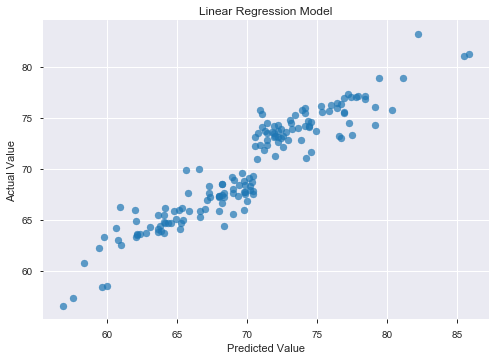

In [22]:
#Let’s visualise the prediction
plt.scatter(y_test,y_pred,alpha=.7)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show()

In [23]:
#DecisionTree Model
from sklearn.tree import DecisionTreeRegressor
Decision_model = DecisionTreeRegressor(criterion='mse',max_depth=4,min_samples_leaf=1,random_state=1)
# pass through the X_train & y_train data set
Decision_model.fit(X_train,y_train)
y1_pred = Decision_model.predict(X_test)
print('Mean Absolute Error:',mean_absolute_error(y_test, y1_pred))
accuracy=Decision_model.score(X_test,y_test)
print("Accuracy:",round(accuracy*100,2))

Mean Absolute Error: 2.3668106502796338
Accuracy: 75.8


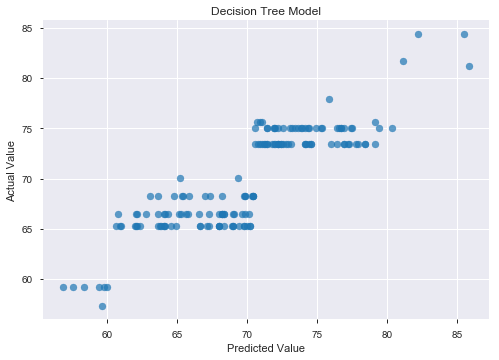

In [24]:
#Let’s visualise the prediction
plt.scatter(y_test,y1_pred,alpha=.7)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Decision Tree Model')
plt.show()

In [25]:
#RandomForest Model
from sklearn.ensemble import RandomForestRegressor
Random_model = RandomForestRegressor(criterion='mse',max_depth=4,min_samples_leaf=1,random_state=1)
# pass through the X_train & y_train data set
Random_model .fit(X_train,y_train)
y2_pred = Random_model .predict(X_test)
print('Mean Absolute Error:',mean_absolute_error(y_test, y2_pred))
accuracy=Random_model .score(X_test,y_test)
print("Accuracy:",round(accuracy*100,2))

Mean Absolute Error: 2.3135000823844387
Accuracy: 77.0


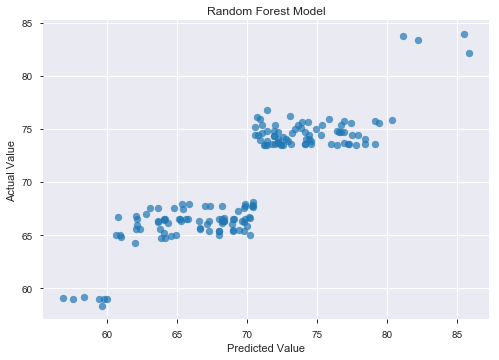

In [26]:
#Let’s visualise the prediction
plt.scatter(y_test,y2_pred,alpha=.7)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Random Forest Model')
plt.show()

In [27]:
#Compare Actual and predicted values:
dff= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
dff.head()

Actual  Predicted
919  82.222222  83.182457
480  59.454545  62.203080
324  68.181818  68.491375
517  63.666667  65.442297
555  71.222222  71.855077

Text(0,0.5,'Marks%')

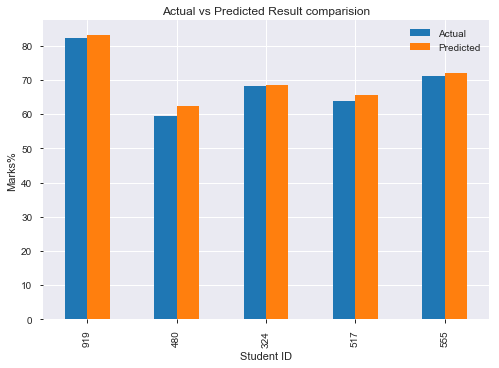

In [28]:
dff[:5].plot(kind='bar')
plt.title("Actual vs Predicted Result comparision")
plt.xlabel("Student ID")
plt.ylabel("Marks%")

In [29]:
#Compare Actual and predicted values:
dff1= pd.DataFrame({'Actual': y_test,'Predicted': y1_pred})
dff1.head()

Actual  Predicted
919  82.222222  84.381313
480  59.454545  59.196796
324  68.181818  66.509757
517  63.666667  68.223958
555  71.222222  73.472452

Text(0,0.5,'Marks%')

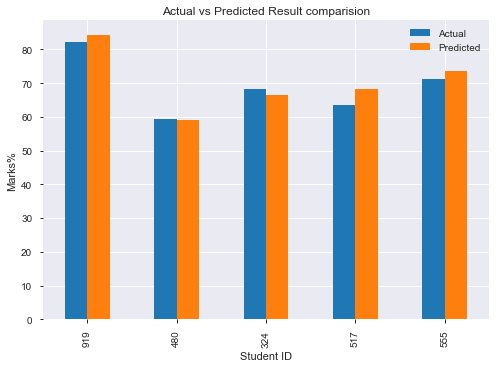

In [30]:
dff1[:5].plot(kind='bar')
plt.title("Actual vs Predicted Result comparision")
plt.xlabel("Student ID")
plt.ylabel("Marks%")

In [31]:
#Compare Actual and predicted values:
dff2= pd.DataFrame({'Actual': y_test,'Predicted': y1_pred})
dff2.head()

Actual  Predicted
919  82.222222  84.381313
480  59.454545  59.196796
324  68.181818  66.509757
517  63.666667  68.223958
555  71.222222  73.472452

Text(0,0.5,'Marks%')

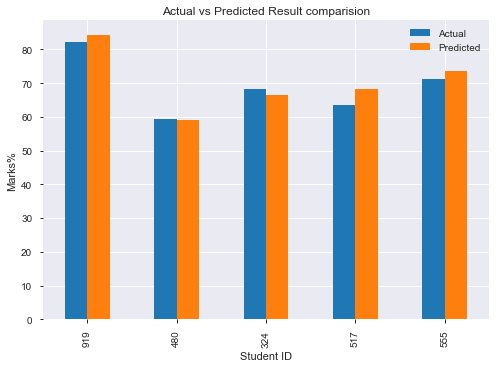

In [32]:
dff2[:5].plot(kind='bar')
plt.title("Actual vs Predicted Result comparision")
plt.xlabel("Student ID")
plt.ylabel("Marks%")

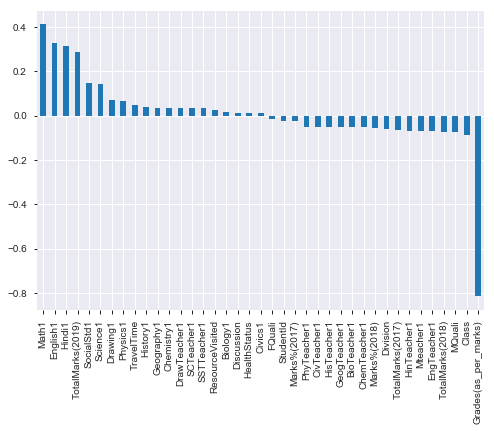

In [33]:
df3=df2.drop(['Marks%(2019)'])
df3.plot(kind='Bar')

In [34]:
df8=pd.read_excel('Teacher_Performance.xlsx')
df8.head()

Class       Mteacher1 PhyTeacher1 ChemTeacher1 BioTeacher1 GeogTeacher1  \
0      1   SAURABH DOSHI         NaN          NaN         NaN          NaN   
1      1  SAGAR DESHMUKH         NaN          NaN         NaN          NaN   
2      1    TUSHAR YADAV         NaN          NaN         NaN          NaN   
3      1  SAGAR DESHMUKH         NaN          NaN         NaN          NaN   
4      1  SAGAR DESHMUKH         NaN          NaN         NaN          NaN   

  CivTeacher1 HisTeacher1      HinTeacher1          EngTeacher1  \
0         NaN         NaN     DIKSHA TAMBE      Domesday Naples   
1         NaN         NaN  ANKITA DESHMUKH       Bradley Isabel   
2         NaN         NaN     YASH AGRAWAL  Andalusia Melanesia   
3         NaN         NaN  ANKITA DESHMUKH       Bradley Isabel   
4         NaN         NaN  ANKITA DESHMUKH       Bradley Isabel   

         SSTTeacher1          SCTeacher1      DrawTeacher1  TotalMarks(2019)  \
0  Yale Transylvania  Siegfried Paraguay  Azerbaijan Hades               347   
1  Islamic Inverness      Lubell Claudio       Lev Elliott               384   
2    Permian Douglas  Dalhousie Saratoga     Aesop Piraeus               341   
3  Islamic Inverness      Lubell Claudio       Lev Elliott               329   
4  Islamic Inverness      Lubell Claudio       Lev Elliott               334   

   Marks%(2019)  TotalMarks(2018)  Marks%(2018) Grades(as per marks)  
0     63.090909               NaN           NaN                   G2  
1     69.818182               NaN           NaN                   G2  
2     62.000000               NaN           NaN                   G2  
3     59.818182               NaN           NaN                   G2  
4     60.727273               NaN           NaN                   G2

Text(0.5,1,'Best Sub-Teacher Class_Wise')

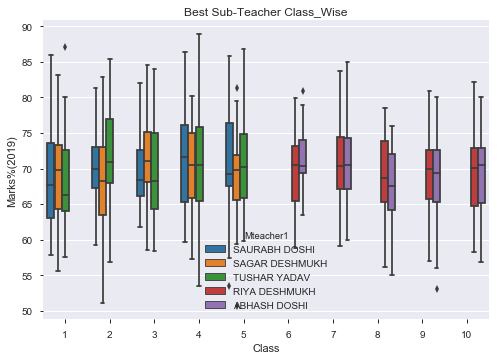

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax=sns.boxplot(x='Class', y='Marks%(2019)',hue='Mteacher1',data=df8)
plt.title("Best Sub-Teacher Class_Wise")

Text(0.5,1,'Best sub-Teacher Class_Wise')

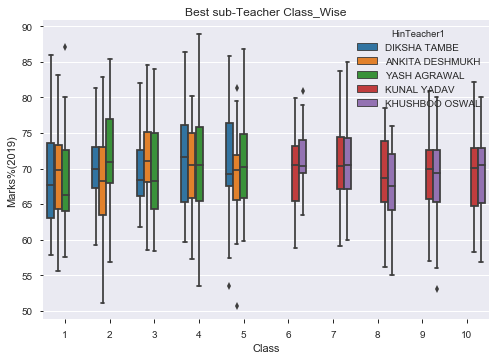

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax=sns.boxplot(x='Class', y='Marks%(2019)',hue='HinTeacher1',data=df8)
plt.title("Best sub-Teacher Class_Wise")

In [37]:
df9=pd.read_excel('School_Analytics_03092019.xlsx')
df9.head()


StudentID TitleId      FName      LName               PName       Stream  \
0         17      Mr   Sherwood     Europa     Sherwood Europa     secondry   
1         22    Miss   Kowalski  Vicksburg  Kowalski Vicksburg  Pre Primary   
2         25      Mr  Vicksburg     Olivia    Vicksburg Olivia      Primary   
3         26      Mr       Odin    Palmyra        Odin Palmyra  Pre Primary   
4         30    Miss    Clinton    Kennedy     Clinton Kennedy  Pre Primary   

   Class Division  AdmissionNo AdmissionDate  Roll Gender DateOfBirth  Age  \
0      1        B          393    2019-04-20  1360      M  2009-07-21    7   
1      1        A          798    2018-01-19   659      F  2011-07-21    8   
2      1        C           92    2018-06-29  1451      M  2012-07-20    8   
3      1        A         1365    2017-07-18   456      M  2004-07-22    8   
4      1        A         1447    2017-03-04   808      F  2007-07-22    5   

    Religion    Caste  StudentPhone                 StudentEmail  \
0  Christian  General  6.352454e+09     SherwoodEuropa@gmail.com   
1       Sikh  General  9.919366e+09  KowalskiVicksburg@gmail.com   
2      Hindu  General  5.709223e+09    VicksburgOlivia@gmail.com   
3   Buddhist  General  4.312585e+09        OdinPalmyra@gmail.com   
4     Muslim  General  9.293799e+09     ClintonKennedy@gmail.com   

  FatherFirstName    FatherQuali FatherOccupation   FatherPhone  \
0           Haiti  Post-Graduate         services  6.050863e+09   
1         Anselmo            Ssc           health  1.242280e+09   
2          Groton            Ssc           health  8.482444e+09   
3           Volvo            Hsc         services  9.189154e+09   
4       Galapagos  Post-Graduate          teacher  5.875245e+09   

                  FatherEmail MotherFirstName    MotherQuali MotherOccupation  \
0       HaitiEuropa@gmail.com         Siamese      Below Ssc         services   
1  AnselmoVicksburg@gmail.com           Titus  Post-Graduate           health   
2      GrotonOlivia@gmail.com           Aleck      Below Ssc         services   
3      VolvoPalmyra@gmail.com            Thea  Post-Graduate         services   
4  GalapagosKennedy@gmail.com         Maurine            Ssc          teacher   

    MotherPhone               MotherEmail PresentArea CountryID      StateID  \
0  8.702829e+09   SiameseEuropa@gmail.com        Pune     India  Maharashtra   
1  9.145528e+09  TitusVicksburg@gmail.com        Pune     India  Maharashtra   
2  3.474291e+09     AleckOlivia@gmail.com        Pune     India  Maharashtra   
3  7.275533e+09     TheaPalmyra@gmail.com        Pune     India  Maharashtra   
4  3.520537e+09  MaurineKennedy@gmail.com        Pune     India  Maharashtra   

  CityID  Pincode  AcademicYear PlaceBirth MotherTongue BusStatus  \
0   Pune   411001          2019       Pune      Marathi        No   
1   Pune   411001          2018       Pune      Marathi       Yes   
2   Pune   411001          2018       Pune      Marathi       Yes   
3   Pune   411001          2017       Pune      Marathi       Yes   
4   Pune   411001          2017       Pune      Marathi       Yes   

  MinorityStatus  
0             No  
1             No  
2             No  
3             No  
4             No

Text(0.5,1,'Distribution of Age Class_Wise')

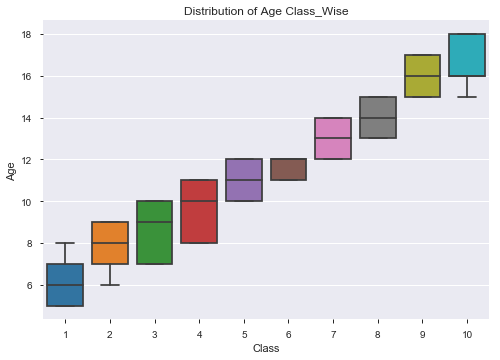

In [40]:
y=df9.Age.median()
fig = plt.figure()
bx = fig.add_subplot(111)
bx=sns.boxplot(x='Class', y='Age',data=df9)
plt.title("Distribution of Age Class_Wise")

Text(0,0.5,'Age')

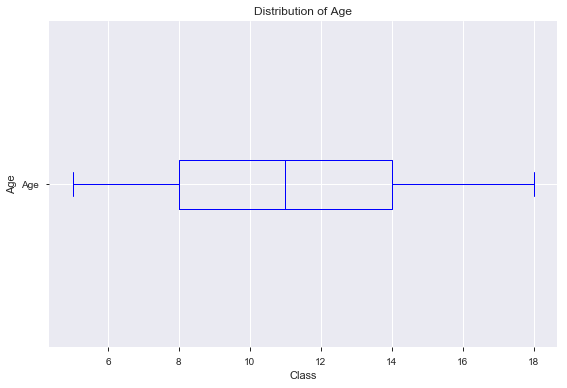

In [39]:
fig = plt.figure() # create figure
 
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
#ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
#ax2 = fig.add_subplot(1, 2, 3) # add subplot 1 (1 row, 2 columns,third plot)
#ax1 = fig.add_subplot(1, 2, 4) # add subplot 2 (1 row, 2 columns, fourth plot). See tip below**
 
# Subplot 1: Box plot
df9.Age.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Age')
ax0.set_xlabel('Class')
ax0.set_ylabel('Age')
 